In [1]:
import numpy as np
from PIL import Image
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.losses import *
from tensorflow.keras.regularizers import *
from tensorflow.keras.initializers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.datasets import *
from tensorflow.keras.preprocessing.image import *

# Multiclass 
essentially have a greater number of subclasses than before

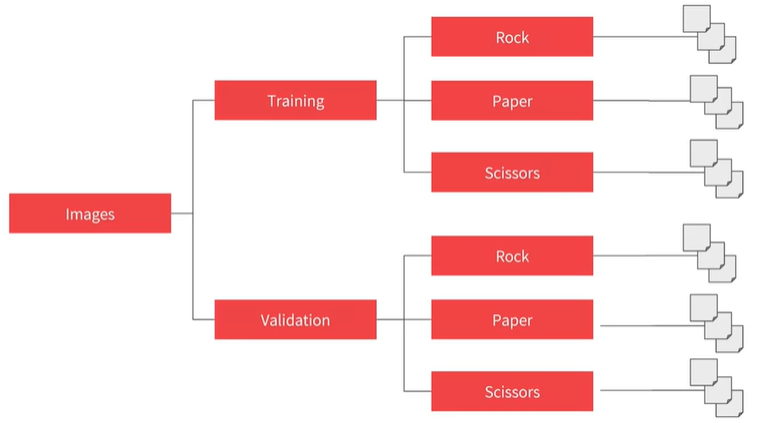

In [2]:
Image.open(r'C:\Users\44788/Desktop\it1.png')

In [2]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest') 

train_dir = r'C:\Users\44788\Desktop\OctaveML\Rock_Paper_scissors\rps_train'
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(300,300),
                                                   batch_size=20,
                                                   class_mode='categorical')

Found 2520 images belonging to 3 classes.


In [3]:
validation_datagen = ImageDataGenerator(rescale=1./255) 
validation_dir = r'C:\Users\44788\Desktop\OctaveML\Rock_Paper_scissors\rps_test'
validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                   target_size=(300,300),
                                                   batch_size=20,
                                                   class_mode='categorical')

Found 372 images belonging to 3 classes.


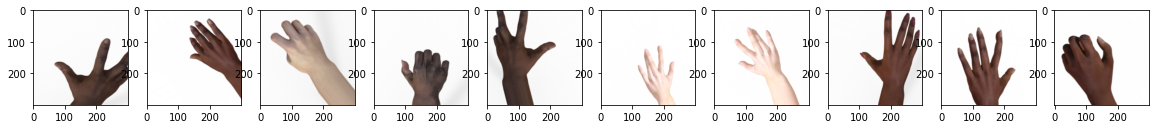

In [4]:
images = train_generator[1]
im = images[1]
fig, ax = plt.subplots(1,10, figsize=(20,20))
for i in range(10):
    im = images[0]
    ax[i].imshow(im[i])

In [6]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, min_delta=0.001)

checkpoint_path = r'C:\Users\44788\Desktop\OctaveML\Rock_Paper_scissors'
checkpoint = ModelCheckpoint(filepath = checkpoint_path,
                            frequency='epoch',
                            save_weights_only=True,
                            save_best_only=True,
                            monitor='val_accuracy',
                            verbose=0)

In [7]:
def res_net_block(input_data, filters, conv_size):
    x = Conv2D(filters, conv_size, activation='relu', padding='same')(input_data)
    x = BatchNormalization()(x)
    x = Conv2D(filters, conv_size, activation=None, padding='same')(x)
    x = BatchNormalization()(x)
    x = Add()([x, input_data])
    x = Activation('relu')(x)
    return x

In [8]:
inputs = Input(shape=(300, 300, 3))
x = Conv2D(16, 3, activation='relu')(inputs)
x = Conv2D(32, 3, activation='relu')(x)
x = MaxPooling2D(3)(x)
num_res_net_blocks = 3

for i in range(num_res_net_blocks):
    x = res_net_block(x, 32, 3)

x = Conv2D(64, 3, activation='relu')(x)
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(3, activation='softmax')(x)
res_net_model = Model(inputs, outputs)

In [9]:
res_net_model.compile(optimizer=RMSprop(lr=0.0001),
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

In [11]:
history = res_net_model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=10,
                    callbacks=[checkpoint, early_stopping])

Epoch 1/10
126/126 [==============================] - 44s 350ms/step - loss: 0.3430 - accuracy: 0.8746 - val_loss: 1.1340 - val_accuracy: 0.4651
Epoch 2/10
126/126 [==============================] - 44s 350ms/step - loss: 0.3191 - accuracy: 0.8857 - val_loss: 1.7483 - val_accuracy: 0.5672
Epoch 3/10
126/126 [==============================] - 44s 348ms/step - loss: 0.2741 - accuracy: 0.9099 - val_loss: 24.9857 - val_accuracy: 0.3333
Epoch 4/10
126/126 [==============================] - 44s 349ms/step - loss: 0.2503 - accuracy: 0.9258 - val_loss: 1.1757 - val_accuracy: 0.7285
Epoch 5/10
126/126 [==============================] - 46s 366ms/step - loss: 0.2023 - accuracy: 0.9365 - val_loss: 12.9177 - val_accuracy: 0.3333
Epoch 6/10
126/126 [==============================] - 45s 353ms/step - loss: 0.1868 - accuracy: 0.9377 - val_loss: 6.5093 - val_accuracy: 0.5215
Epoch 7/10
126/126 [==============================] - 44s 350ms/step - loss: 0.1775 - accuracy: 0.9433 - val_loss: 81.5061 - val

<AxesSubplot:>

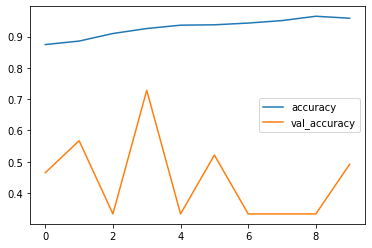

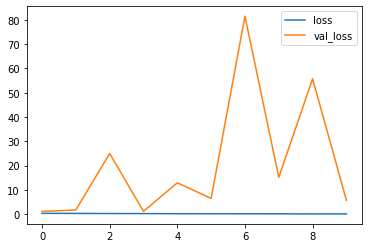

In [12]:
df = pd.DataFrame(history.history)
df.plot(y=['accuracy', 'val_accuracy'])
df.plot(y=['loss', 'val_loss'])

Found 33 images belonging to 1 classes.
image 1 predicition: scissors
image 2 predicition: rock
image 3 predicition: rock
image 4 predicition: scissors
image 5 predicition: scissors
image 6 predicition: rock
image 7 predicition: rock
image 8 predicition: rock
image 9 predicition: scissors
image 10 predicition: rock


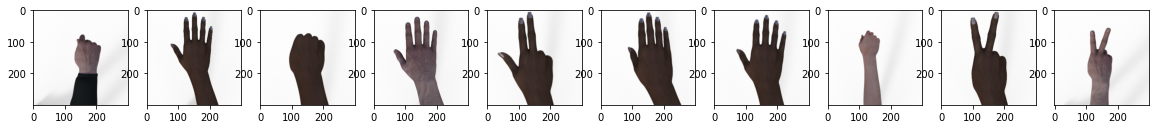

In [83]:
RPS = ['rock', 'paper', 'scissors']
test_datagen = ImageDataGenerator(rescale=1./255) 
test_pred_fold = r'C:\Users\44788\Desktop\OctaveML\Rock_Paper_scissors\tests'
test_generator = validation_datagen.flow_from_directory(test_pred_fold,
                                                   target_size=(300,300))
predict = res_net_model.predict_generator(test_generator,len(test_generator))

images = test_generator
fig, ax = plt.subplots(1,10, figsize=(20,20))
for i in range(10):
    im = images[0]
    ax[i].imshow(im[0][i])
    print('image', i+1, 'predicition:', RPS[np.argmax(predict[i])])